In [62]:
# Imports
import os
import sqlite3
from chemkin_CS207_G9.chemkin.parser.database_query import CoeffQuery
from chemkin_CS207_G9.chemkin.parser.xml2dict import xml2dict
from chemkin_CS207_G9.chemkin.reaction.Reaction import Reaction
import chemkin_CS207_G9.chemkin.data as data_folder
import graphviz 
from graphviz import Digraph
import numpy as np
import random


# Paths
BASE_DIR = os.path.dirname(os.path.abspath(data_folder.__file__))
path_xml = os.path.join(BASE_DIR, 'rxns_reversible.xml') # path to the .xml file
path_sql = os.path.join(BASE_DIR, 'nasa_thermo.sqlite')  # path to the .sqlite file

In [13]:
# Preparing to query NASA Coefficients
nasa_query = CoeffQuery(path_sql)
db = sqlite3.connect(path_sql)
cursor = db.cursor()

# Selecting all coefficients from LOW database
query = '''SELECT * FROM LOW'''
cursor.execute(query).fetchall();

In [24]:
# Loading Reactions and Species from xml file
reader = xml2dict()
reader.parse(path_xml)
info = reader.get_info()
# Getting species
species = info[0]
# Getting reactions
reactions = [Reaction(**r) for r in info[1]]

[{'coeffParams': {'A': 3547000000000000.0, 'b': -0.406, 'E': 16599.0}, 'ID': 'reaction01', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H': 1, 'O2': 1}, 'products': {'O': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 50800.0, 'b': 2.67, 'E': 6290.0}, 'ID': 'reaction02', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2': 1}, 'products': {'H': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 216000000.0, 'b': 1.51, 'E': 3430.0}, 'ID': 'reaction03', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H2': 1, 'OH': 1}, 'products': {'H2O': 1, 'H': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 2970000.0, 'b': 2.02, 'E': 13400.0}, 'ID': 'reaction04', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2O': 1}, 'products': {'OH': 2}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 16600000000000.0, 'E': 823.0}, 'ID': 'reaction05', 'reversible': 'yes', 'TYPE': 'Elementary', 're

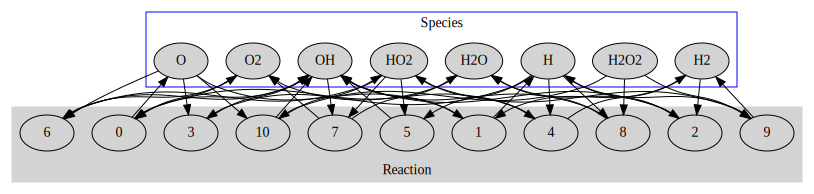

In [26]:
# Testing Bipartite Graph

bipartite = Digraph(comment='Bipartite Graph')
with bipartite.subgraph(name='cluster_1') as c:
    c.attr(style='filled')
    c.attr(label='Reaction', labelloc = 'b')
    c.attr(color='lightgrey')
    for idx, r in enumerate(reactions):
        c.node(str(idx))
        
with bipartite.subgraph(name='cluster_0') as c:
    c.node_attr.update(style='filled')
    c.attr(color='blue')
    c.attr(label='Species')
    for s in species:
        c.node(s)
        
for idx, r in enumerate(reactions):
    for k1 in r.getReactants():
        bipartite.edge(k1, str(idx))
    for k2 in r.getProducts():
        bipartite.edge(str(idx), k2)
    
# Print the graph
bipartite

In [28]:
# Defining Style

styles = {
    'graph': {
        'label': 'A Fancy Graph',
        'fontsize': '16',
        'fontcolor': 'white',
        'bgcolor': '#333333',
        'rankdir': 'BT',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'hexagon',
        'fontcolor': 'white',
        'color': 'white',
        'style': 'filled',
        'fillcolor': '#006699',
    },
    'edges': {
        'style': 'dashed',
        'color': 'white',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'white',
    }
}


H is more reactant than product
O is more reactant than product
OH is more product than reactant
H2 is more reactant than product
H2O is more product than reactant
O2 is more product than reactant
HO2 is more reactant than product
H2O2 is pure product
// Hierarchical Graph
digraph "Top graph" {
	H -> O [color="#6B8434"]
	H -> OH [color="#6B8434"]
	H -> O2 [arrowhead=none color="#6B8434"]
	O2 -> O [color="#6B8434"]
	O2 -> OH [color="#6B8434"]
	O -> H [color="#422FC1"]
	O -> OH [color="#422FC1"]
	O -> H2 [arrowhead=none color="#422FC1"]
	H2 -> H [color="#422FC1"]
	H2 -> OH [color="#422FC1"]
	H2 -> H2O [color="#AA8A55"]
	H2 -> H [color="#AA8A55"]
	H2 -> OH [arrowhead=none color="#AA8A55"]
	OH -> H2O [color="#AA8A55"]
	OH -> H [color="#AA8A55"]
	O -> OH [color="#4E433A"]
	O -> H2O [arrowhead=none color="#4E433A"]
	H2O -> OH [color="#4E433A"]
	HO2 -> H2 [color="#0D5D72"]
	HO2 -> O2 [color="#0D5D72"]
	HO2 -> H [arrowhead=none color="#0D5D72"]
	H -> H2 [color="#0D5D72"]
	H -> O2 [color="#0D5D

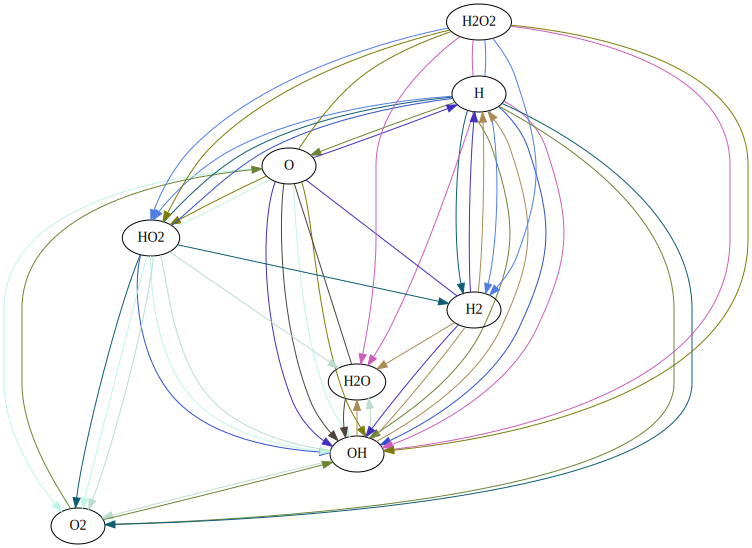

In [112]:
top = Digraph('Top graph',comment='Hierarchical Graph')
bot = Digraph('Bot graph')
mid_top = Digraph('Mid Top graph')
mid_bot = Digraph('Mid Bot graph')
bot.graph_attr.update(rank='min')
# top.graph_attr.update(rank='2')
# mid_bot.graph_attr.update(rank='3')
# mid_top.graph_attr.update(rank='4')
# mid_bot.graph_attr.update(rank='min')
# reactant_count = {s:0 for s in species}
# product_count = {s:0 for s in species}

def is_reactant(s):
    for r in reactions:
        if s in r.getReactants().keys():
            return True

def is_product(s):
    for r in reactions:
        if s in r.getProducts().keys():
            return True

for s in species:
    for r in reactions:
        if s in r.getReactants().keys():
            reactant_count[s]+=1
        if s in r.getProducts().keys():
            product_count[s]+=1

# print('reactant_count,product_count',reactant_count,product_count)
for s in species:
#     print(s)
#     print('reactant_count[s],product_count[s]',reactant_count[s],product_count[s])
    if reactant_count[s] == 0:
        print(s,'is pure reactant')
        top.node(s,_attributes={'rank':'same'})
    elif product_count[s] == 0:
        print(s,'is pure product')
        bot.node(s,rank='same',color='red')
    elif reactant_count[s] >= product_count[s]:
        print(s,'is more reactant than product')
        mid_top.node(s,rank='same',color='red')
    elif reactant_count[s] < product_count[s]:
        print(s,'is more product than reactant')
        mid_bot.node(s,_attributes={'rank':'same'})
    
graphics = {}
for r in reactions:
    color = '#%02X%02X%02X' % (random.randint(0,255),random.randint(0,255),random.randint(0,255))
#     print(color)
    graphics['color'] = color
    for idx, k1 in enumerate(r.getReactants().keys()):
        for i,k in enumerate( r.getProducts() ):
            top.edge(k1, k,  color = color)
        for jdx, k2 in enumerate(r.getReactants().keys()):
            if k1 != k2 and jdx > idx:
                top.edge(k1, k2, arrowhead = 'none', color = color)   
                
#top.graph_attr.update(('edges' in styles and styles['edges']) or {})

print(top.source)
top

In [92]:
('edges' in styles and styles['edges']) or {}

{'arrowhead': 'open',
 'color': 'white',
 'fontcolor': 'white',
 'fontname': 'Courier',
 'fontsize': '12',
 'style': 'dashed'}

In [40]:
# Class for Hierarchical graph

class Hierarchical():
    
    def __init__(self,reactions):
        self.top = Digraph('Top graph')
        self.bot = Digraph('Bot graph')
        self.mid_top = Digraph('Mid Top graph')
        self.mid_bot = Digraph('Mid Bot graph')
        self.bot.subgraph(top)
        self.mid_bot.subgraph(top)
        self.mid_top.subgraph(top)
        self.load_species
        self.reactions = reactions
        
    def view(self):
        """
        Displays and saves graph.
        """
        self.top.view()

    def load_species(self):
        for s in species:
            if is_reactant(s):
                reactant_count[s]+=1
            if is_product(s):
                product_count[s]+=1

        for s in species:
            if reactant_count[s] == 0:
                top.node(s)
            elif product_count[s] == 0:
                bot.node(s)
            elif reactant_count[s] > product_count[s]:
                mid_top.node(s)
            elif reactant_count[s] < product_count[s]:
                mid_bot.node(s)
    
    def set_edges(self):
        for r in self.reactions:
            for idx, k1 in enumerate(r.getReactants().keys()):
                for i,k in enumerate( r.getProducts() ):
                    top.edge(k1, k, color = "red")
                for jdx, k2 in enumerate(r.getReactants().keys()):
                    if k1 != k2 and jdx > idx:
                        top.edge(k1, k2, arrowhead = 'none')   
                    
    def is_reactant(self,s):
        for r in reactions:
            if s in r.getReactants().keys():
                return True

    def is_product(self,s):
        for r in reactions:
            if s in r.getProducts().keys():
                return True


        

In [42]:
g = Hierarchical(reactions)
g.top